## VN30F1M 1m timeframe - volume profile

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import requests

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

In [2]:
USER_AGENTS = [
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_3_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36"
]

HEADERS = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
VNDIRECT_DATA_HISTORY_URL = 'https://dchart-api.vndirect.com.vn/dchart/history'
URL = VNDIRECT_DATA_HISTORY_URL

In [3]:
def getStockHistoryData(ticker, timestamp_from=0, timestamp_to=0):
    if timestamp_from == 0:
        three_months = date.today() + relativedelta(months=-3)
        timestamp_from = datetime.strptime(three_months.strftime("%m/%d/%Y") + ', 00:00:0', "%m/%d/%Y, %H:%M:%S")\
            .timestamp()
    if timestamp_to == 0:
        timestamp_to = datetime.strptime(date.today().strftime("%m/%d/%Y") + ', 23:59:00', "%m/%d/%Y, %H:%M:%S")\
            .timestamp()

    params = {
        "resolution": "1",
        "symbol": str(ticker),
        "from": int(timestamp_from),
        "to": int(timestamp_to)
    }

    x = requests.get(URL, params=params, headers=HEADERS)
    response = x.json()

    import numpy as np
    import pandas as pd

    timestamp = np.array(response['t']).astype(int)
    close = np.array(response['c']).astype(float)
    open = np.array(response['o']).astype(float)
    high = np.array(response['h']).astype(float)
    low = np.array(response['l']).astype(float)
    volume = np.array(response['v']).astype(int)

    dataset = pd.DataFrame({'Time': timestamp, 'Open': list(open), 'High': list(high), 'Low': list(low),
                            'Close': list(close), 'Volume': list(volume)},
                           columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    return dataset

In [4]:
def prepareData(htd):
    if 'Time' in htd.columns:
        from datetime import datetime

        htd['DateStr'] = htd.apply(
            lambda x: datetime.fromtimestamp(x['Time']).strftime("%Y-%m-%d %H:%M:%S"), axis=1)

    htd['Date'] = pd.to_datetime(htd['DateStr'])
    # htd['Date'] = htd['Date'] + pd.DateOffset(hours=7)
    ticker_data = htd.set_index('Date')
    ticker_data.drop(columns=['Time', 'DateStr'], inplace=True)
    return ticker_data

In [5]:
ticker = "VN30F1M"
htd = getStockHistoryData(ticker, 0, 0)
data = prepareData(htd)
data = data.dropna()
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-04 09:00:00,1292.6,1292.6,1292.3,1292.5,2200
2024-06-04 09:01:00,1292.2,1292.9,1292.2,1292.7,816
2024-06-04 09:02:00,1292.6,1292.6,1292.3,1292.6,519
2024-06-04 09:03:00,1292.6,1293.4,1292.5,1293.3,1243
2024-06-04 09:04:00,1293.3,1293.9,1292.9,1293.8,1301
...,...,...,...,...,...
2024-09-04 09:13:00,1312.9,1313.0,1312.0,1312.5,1302
2024-09-04 09:14:00,1312.6,1313.0,1312.0,1312.3,887
2024-09-04 09:15:00,1312.1,1312.2,1312.0,1312.2,1187


In [6]:
# Tinh tu ngay dao han phai sinh thang truoc
data = data[data.index > '2024-08-16 23:00:00']
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-19 09:00:00,1289.0,1289.9,1288.3,1289.6,2594
2024-08-19 09:01:00,1289.6,1290.4,1289.6,1289.7,1117
2024-08-19 09:02:00,1289.5,1290.0,1289.2,1289.3,737
2024-08-19 09:03:00,1289.2,1289.3,1289.0,1289.3,697
2024-08-19 09:04:00,1289.1,1289.7,1289.1,1289.3,415
...,...,...,...,...,...
2024-09-04 09:13:00,1312.9,1313.0,1312.0,1312.5,1302
2024-09-04 09:14:00,1312.6,1313.0,1312.0,1312.3,887
2024-09-04 09:15:00,1312.1,1312.2,1312.0,1312.2,1187


In [7]:
data['pivot'] = data.apply(lambda row: (row['High'] + row['Low'] + 2 * row['Close']) / 4, axis=1)

In [8]:
data

,Open,High,Low,Close,Volume,pivot
Date,,,,,,
2024-08-19 09:00:00,1289.0,1289.9,1288.3,1289.6,2594,1289.350
2024-08-19 09:01:00,1289.6,1290.4,1289.6,1289.7,1117,1289.850
2024-08-19 09:02:00,1289.5,1290.0,1289.2,1289.3,737,1289.450
2024-08-19 09:03:00,1289.2,1289.3,1289.0,1289.3,697,1289.225
2024-08-19 09:04:00,1289.1,1289.7,1289.1,1289.3,415,1289.350
...,...,...,...,...,...,...
2024-09-04 09:13:00,1312.9,1313.0,1312.0,1312.5,1302,1312.500
2024-09-04 09:14:00,1312.6,1313.0,1312.0,1312.3,887,1312.400
2024-09-04 09:15:00,1312.1,1312.2,1312.0,1312.2,1187,1312.150


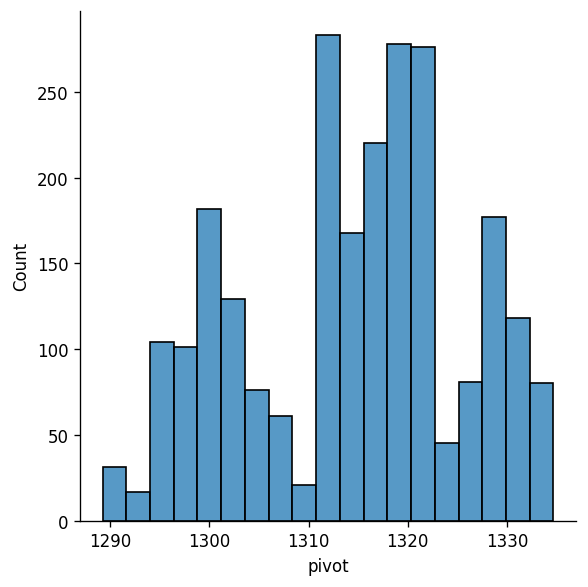

In [9]:
sns.displot(data[['pivot']], x="pivot")

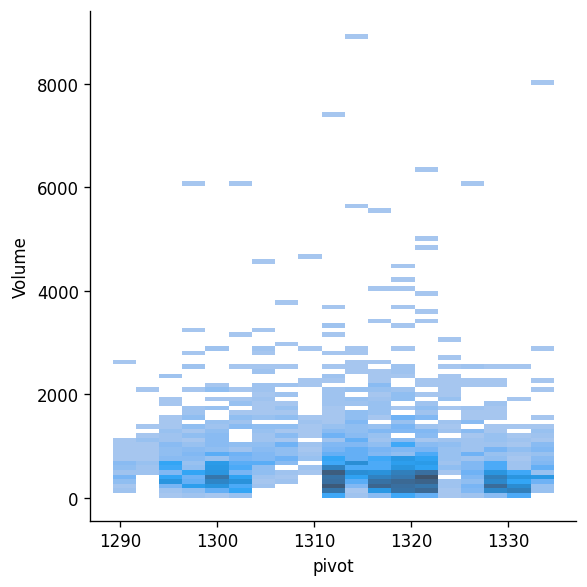

In [10]:
sns.displot(data[['pivot', 'Volume']], x="pivot", y="Volume")

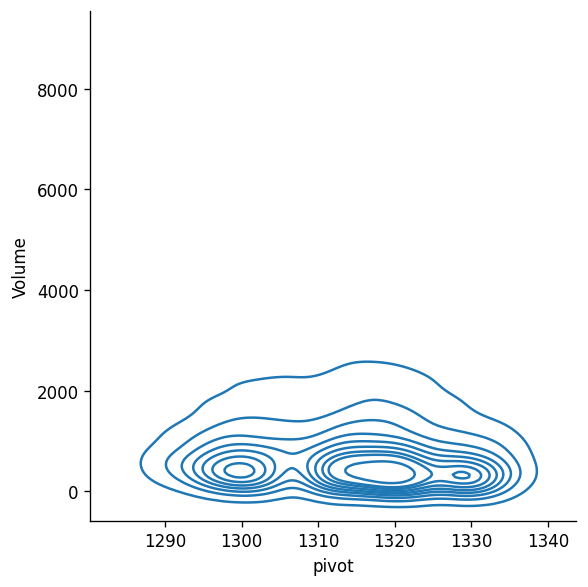

In [11]:
sns.displot(data[['pivot', 'Volume']], x="pivot", y="Volume", kind="kde")

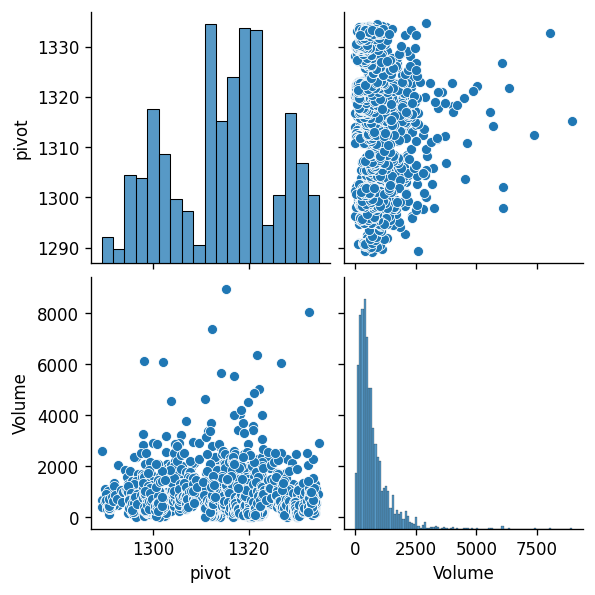

In [12]:
sns.pairplot(data[['pivot', 'Volume']])

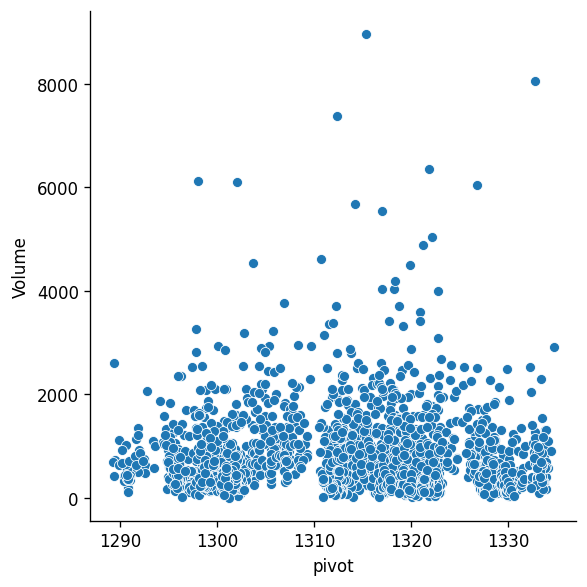

In [13]:
sns.relplot(data=data[['pivot', 'Volume']], x="pivot", y="Volume")

In [14]:
data['pivot'] = data['pivot'].round(0)

In [15]:
grpd = data.groupby('pivot')[['Volume']]
irs = grpd.sum().reset_index()
irs

,pivot,Volume
0,1289.0,4443
1,1290.0,4509
2,1291.0,8888
3,1292.0,9413
4,1293.0,5340
5,1294.0,5554
6,1295.0,26690
7,1296.0,37998
8,1297.0,16141
9,1298.0,52555


In [16]:
irs_volume_sort = irs.sort_values('Volume')
irs_top10 = irs_volume_sort.tail(10)

In [17]:
irs_top10

,pivot,Volume
26,1315.0,62459
32,1321.0,66063
30,1319.0,68087
28,1317.0,71474
24,1313.0,74605
25,1314.0,77099
29,1318.0,80385
33,1322.0,84931
31,1320.0,92389
23,1312.0,98261


In [18]:
irs_top10_pivot_sort = irs_top10.sort_values('pivot', ascending=False)
irs_top10_pivot_sort

,pivot,Volume
33,1322.0,84931
32,1321.0,66063
31,1320.0,92389
30,1319.0,68087
29,1318.0,80385
28,1317.0,71474
26,1315.0,62459
25,1314.0,77099
24,1313.0,74605
23,1312.0,98261
